In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn import datasets 

In [41]:
bh = datasets.load_boston()

In [42]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [43]:
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [47]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0, 0.5, 'count')

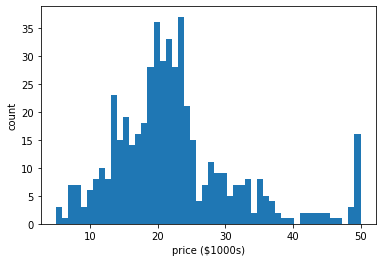

In [49]:
plt.hist(df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')


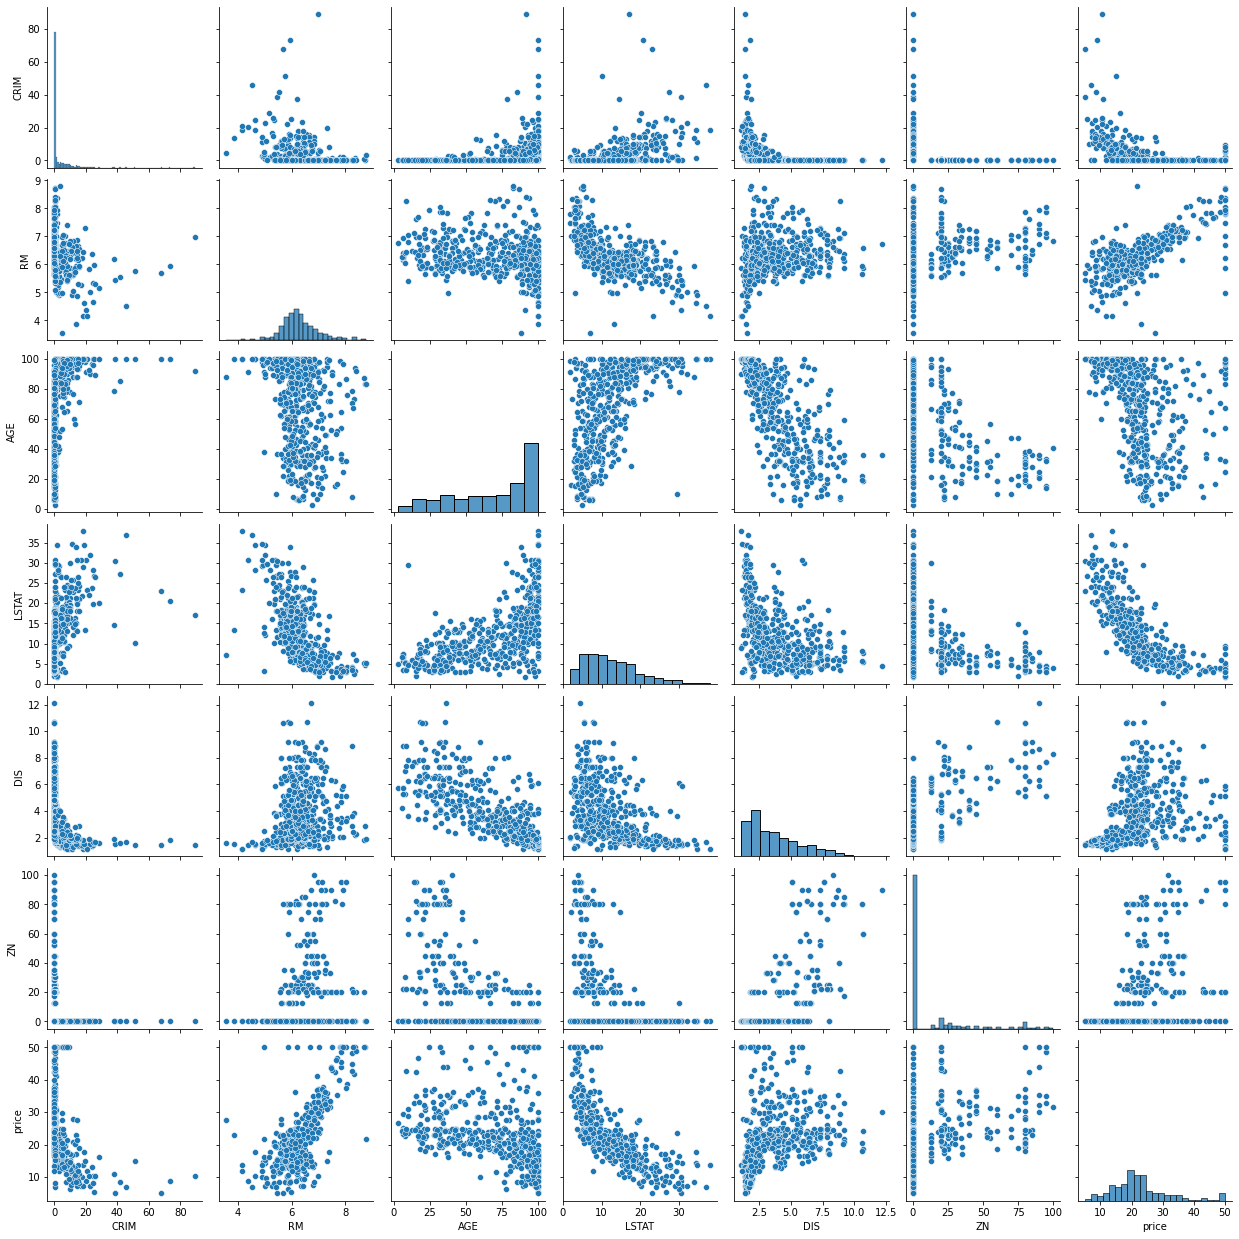

In [50]:
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']]) 

<AxesSubplot:>

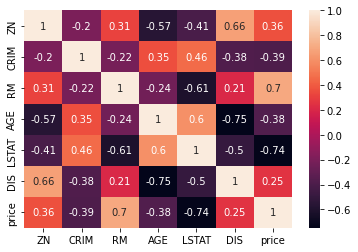

In [51]:
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr(), annot=True)

In [58]:
X = df[['ZN' , 'CRIM' , 'RM' , 'AGE' , 'LSTAT' , 'DIS']]#
y = df['price']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
X_test.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
173,0.0,0.09178,6.416,84.1,9.04,2.6463
274,40.0,0.05644,6.758,32.9,3.53,4.0776
491,0.0,0.10574,5.983,98.8,18.07,1.8681
72,0.0,0.09164,6.065,7.8,5.52,5.2873
452,0.0,5.09017,6.297,91.8,17.27,2.3682


In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 173 to 262
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZN      167 non-null    float64
 1   CRIM    167 non-null    float64
 2   RM      167 non-null    float64
 3   AGE     167 non-null    float64
 4   LSTAT   167 non-null    float64
 5   DIS     167 non-null    float64
dtypes: float64(6)
memory usage: 9.1 KB


In [65]:
from sklearn import linear_model

In [66]:
lm = linear_model.LinearRegression()

In [68]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
lm.intercept_

8.90528697198801

In [71]:
lm.coef_

array([ 0.05834141, -0.17564927,  4.53727272, -0.02529785, -0.66556685,
       -1.24284723])

In [72]:
X.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [74]:
coeff = pd.DataFrame(data = lm.coef_ , index = X.columns, columns = ['coefficens'])

In [75]:
coeff

,coefficens
ZN,0.058341
CRIM,-0.175649
RM,4.537273
AGE,-0.025298
LSTAT,-0.665567
DIS,-1.242847


In [76]:
pred = lm.predict(X_test)

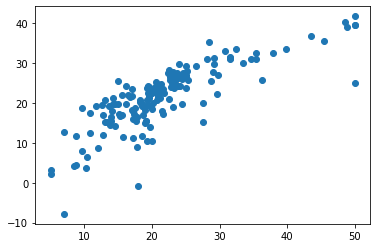

In [78]:
plt.scatter(y_test,pred)

<AxesSubplot:xlabel='price', ylabel='Density'>

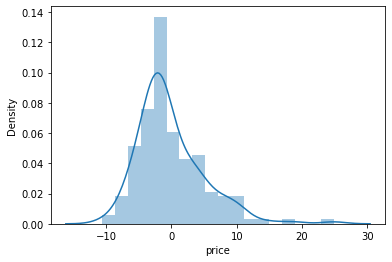

In [80]:
sns.distplot(y_test - pred)

In [81]:
from sklearn import metrics

In [84]:
print('Mean Absolute Error: ' , metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error: ' , metrics.mean_squared_error(y_test, pred))
print('Mean Root  Error: ' , np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error:  3.872312558751269
Mean Squared Error:  26.598371716003292
Mean Root  Error:  5.1573609255125135
